In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [3]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [4]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [5]:
len(data)

21000

In [6]:
cnt_srs=data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()
cnt_srs

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       V

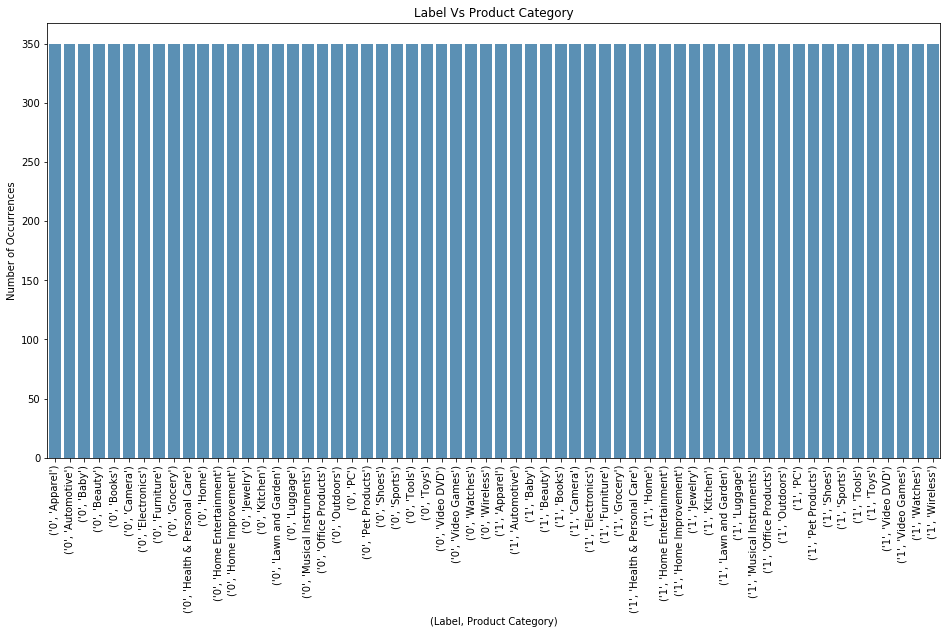

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences')
plt.xlabel('(Label, Product Category)')
plt.title('Label Vs Product Category')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

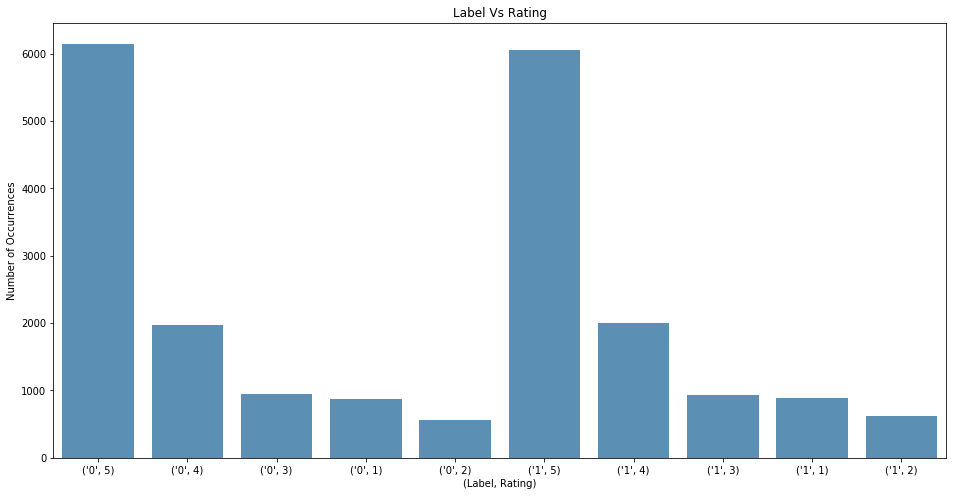

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences')
plt.xlabel('(Label, Rating)')
plt.title('Label Vs Rating')
plt.xticks(rotation='horizontal')
plt.show()

In [17]:
cnt_srs = data.groupby(data["RATING"]).PRODUCT_CATEGORY.value_counts()

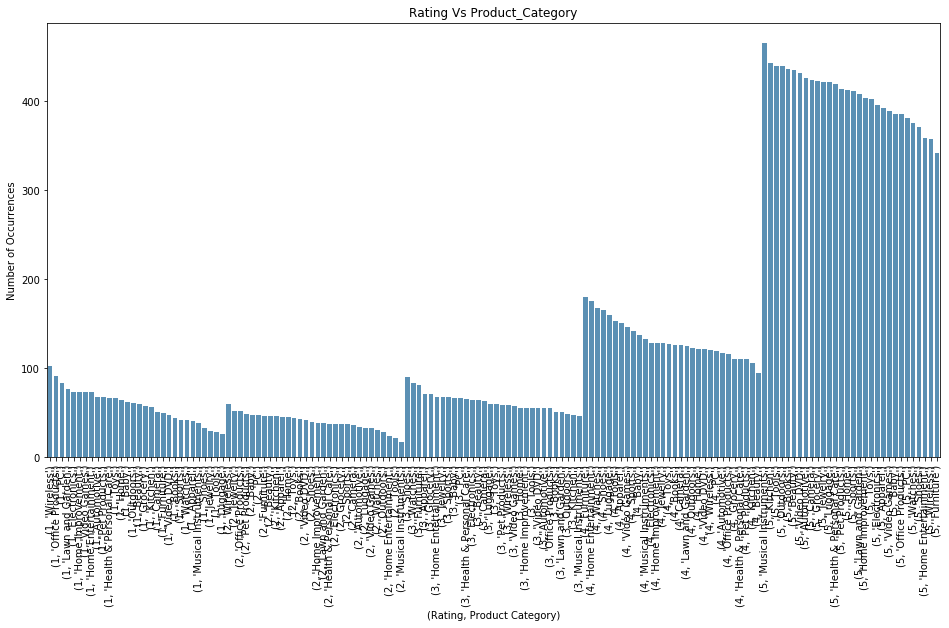

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences')
plt.xlabel('(Rating, Product Category)')
plt.title('Rating Vs Product_Category')
plt.xticks(rotation='vertical')
plt.show()

In [19]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: LABEL, dtype: int64

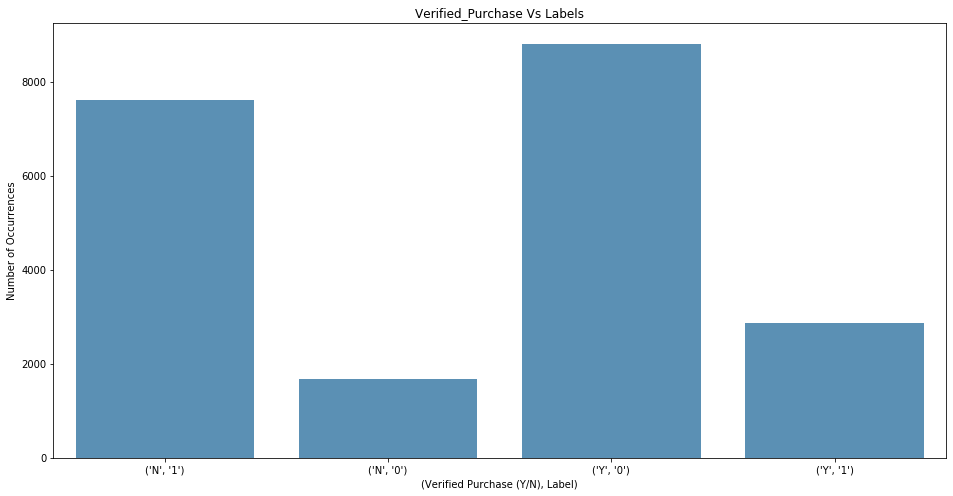

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences')
plt.xlabel('(Verified Purchase (Y/N), Label)')
plt.title('Verified_Purchase Vs Labels')
plt.xticks(rotation='horizontal')
plt.show()

In [21]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [23]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)

In [24]:
cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

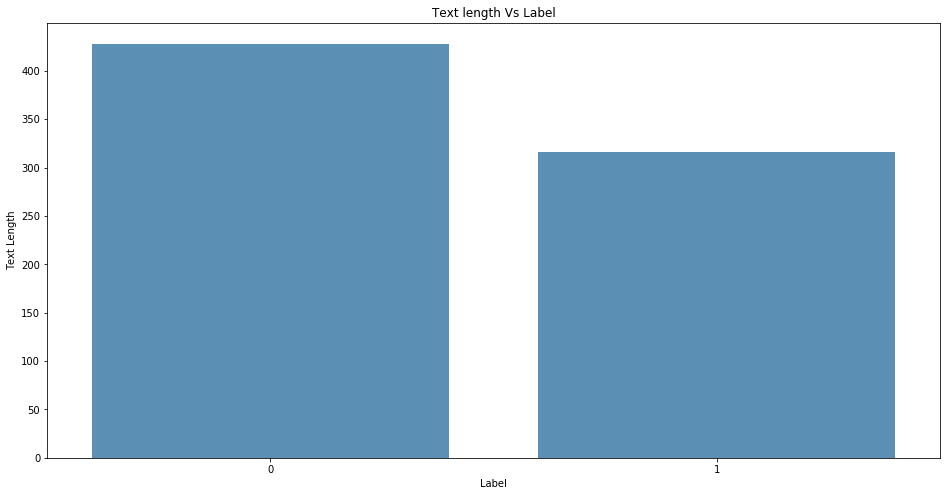

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Text Length')
plt.xlabel('Label')
plt.title('Text length Vs Label')
plt.xticks(rotation='horizontal')
plt.show()

In [26]:
data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))

In [27]:
data

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4
...,...,...,...,...,...,...,...,...,...,...,...
20995,20996,0,4,Y,Shoes,B00BXYM8T8,"Madden Girl Women's Gettaw Pump,Red Patent,7.5...",wide width is great!,"I bought these for work. I have high arches, ...",100,4
20996,20997,0,4,Y,Shoes,B0014C2ORK,"crocs Unisex Classic Clog,Khaki,6 US Men's / 8...",Love crocs!,Crocs are one of only two brands of shoes that...,115,1
20997,20998,0,5,Y,Shoes,B000EX8CCQ,Minnetonka Men's 703 Leather Laced Softsole Mo...,I love moccasins This fit like it was custom m...,I love moccasins This fit like it was custom ...,297,4
20998,20999,0,5,Y,Shoes,B00748YHVE,Ariat Womens Unbridled Fatbaby 9 B Powder Brown,"This fit well, comfortable, best investment",I wish these were a little more durable. I got...,287,6


In [21]:
# !pip install textstat

In [28]:
import textstat
from textstat.textstat import textstat
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [29]:
cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    13.803848
1     8.007886
Name: FK_Score, dtype: float64

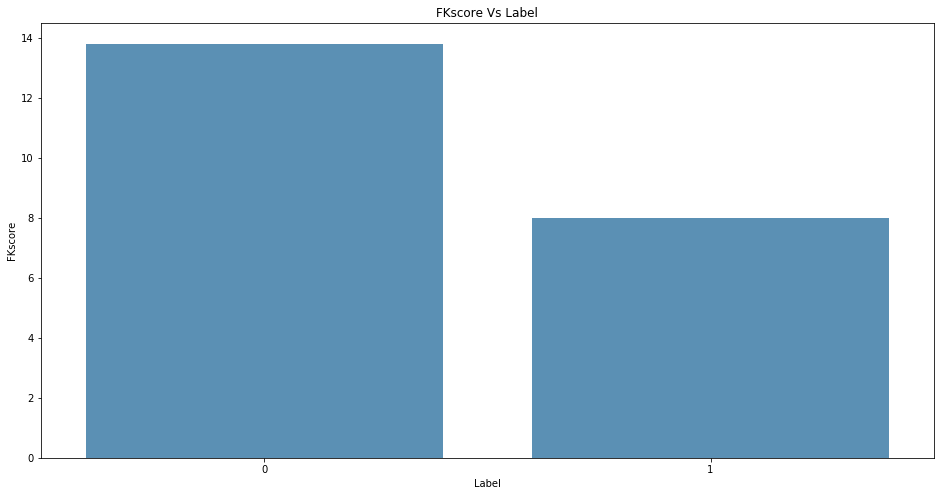

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('FKscore')
plt.xlabel('Label')
plt.title('FKscore Vs Label')
plt.xticks(rotation='horizontal')
plt.show()

In [31]:
import nltk
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bomiao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)

In [33]:
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    32.519048
1    24.696190
Name: stop_count, dtype: float64

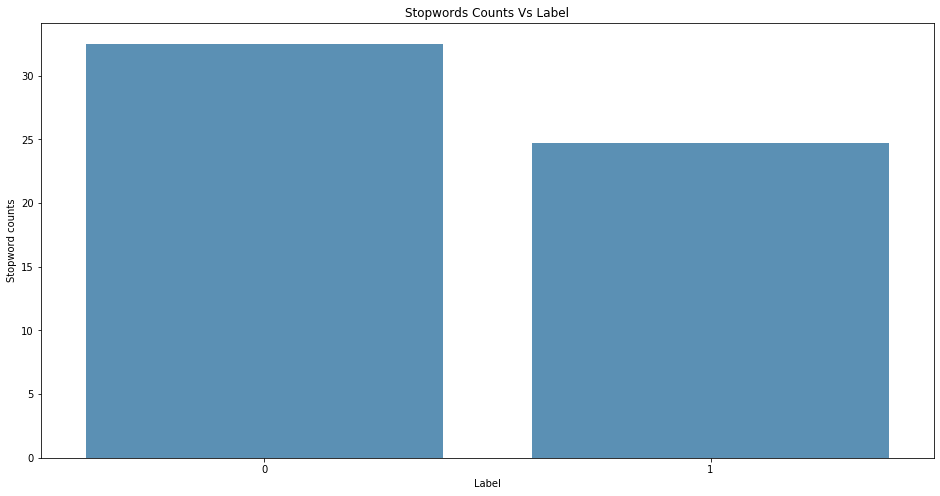

In [34]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts')
plt.xlabel('Label')
plt.title('Stopwords Counts Vs Label')
plt.xticks(rotation='horizontal')
plt.show()

In [35]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum
data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)

In [36]:
cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    12.099810
1     8.712667
Name: caps_count, dtype: float64

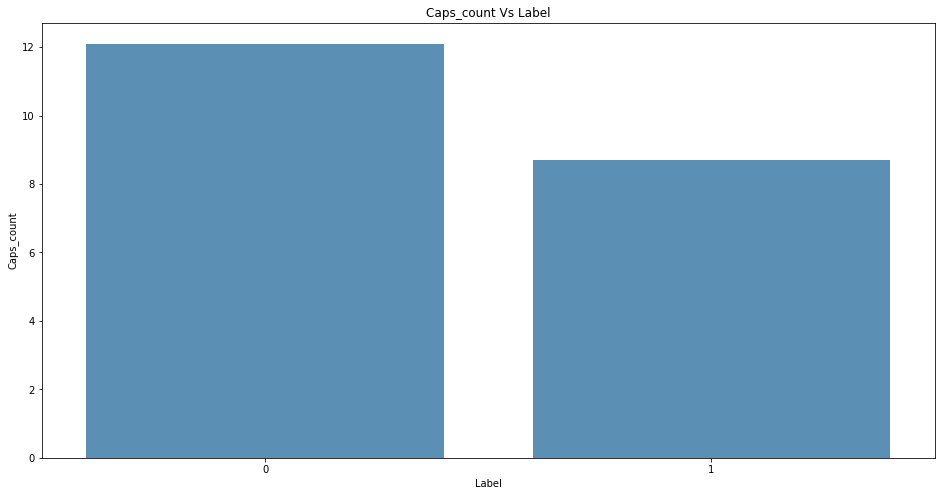

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count')
plt.xlabel('Label')
plt.title('Caps_count Vs Label')
plt.xticks(rotation='horizontal')
plt.show()

In [38]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
def punctCount(x):
    return count(x, set(string.punctuation))
data['punct_count'] = data['REVIEW_TEXT'].apply(punctCount)

In [39]:
cnt_srs = data.groupby(["LABEL"]).punct_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    15.571524
1    10.182571
Name: punct_count, dtype: float64

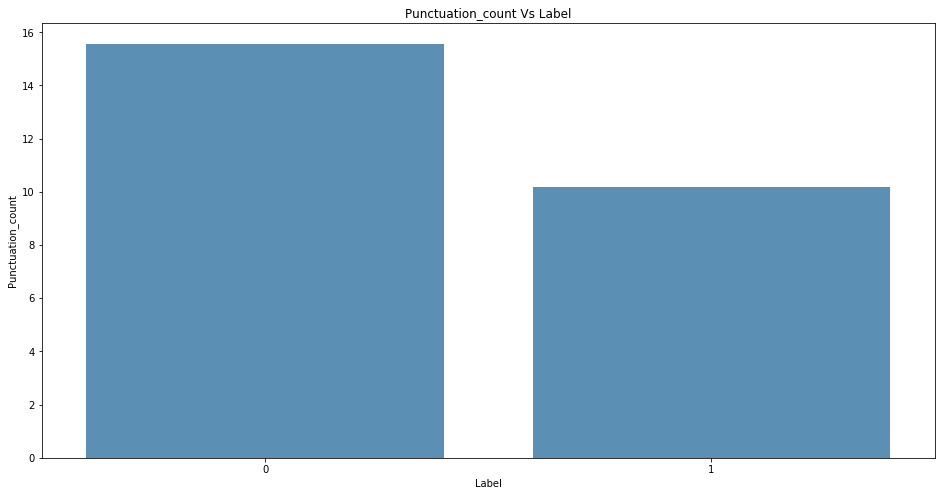

In [40]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Punctuation_count')
plt.xlabel('Label')
plt.title('Punctuation_count Vs Label')
plt.xticks(rotation='horizontal')
plt.show()

In [41]:
import re
import string
match_list = []

def checkName(title,text):
    matches = []
    for word in title.split():
        word = "".join((char for char in word if char not in string.punctuation))
        myreg = r'\b'+word+r'\b'
        r = re.compile(myreg, flags=re.I | re.X)
        matches.append(r.findall(text))
    return len(matches)

for a,b in zip(data.PRODUCT_TITLE, data.REVIEW_TEXT):
    number_of_matches = checkName(a,b)
    match_list.append(number_of_matches)
    
data["matchesDf"] = match_list

In [42]:
cnt_srs = data.groupby(["LABEL"]).matchesDf.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    10.570667
1    13.823143
Name: matchesDf, dtype: float64

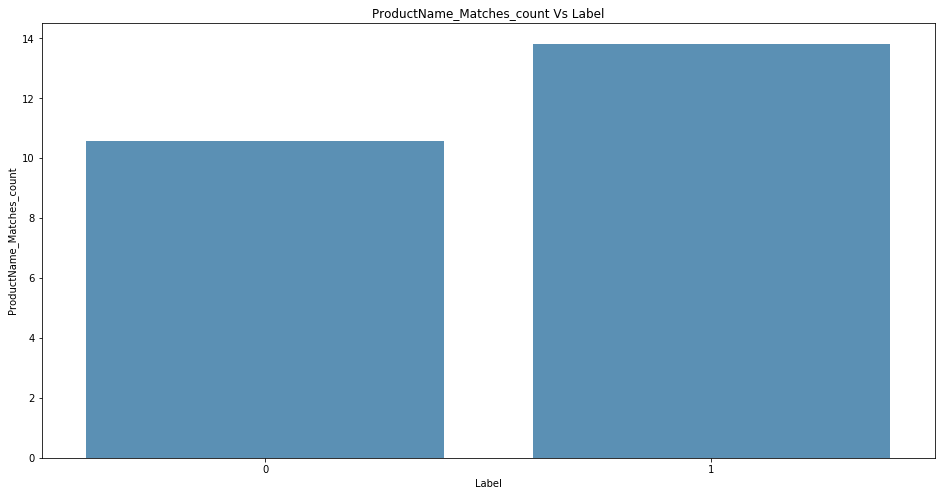

In [43]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('ProductName_Matches_count')
plt.xlabel('Label')
plt.title('ProductName_Matches_count Vs Label')
plt.xticks(rotation='horizontal')
plt.show()

In [44]:
data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)

In [45]:
cnt_srs = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs

LABEL
0    107
1     85
Name: emojis, dtype: int64

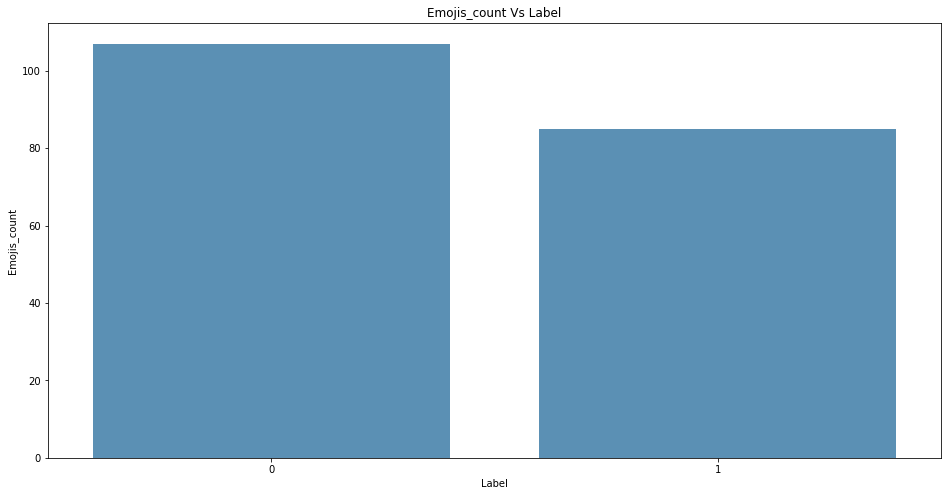

In [46]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Emojis_count')
plt.xlabel('Label')
plt.title('Emojis_count Vs Label')
plt.xticks(rotation='horizontal')
plt.show()

# SENTIMENT CLASSIFIER 

In [47]:
#SENTIMENT CLASSIFIER
data.loc[data["RATING"] < 3, "RATING"] = 0
data.loc[data["RATING"] > 3, "RATING"] = 1

In [48]:
data.RATING.value_counts()

1    16183
0     2949
3     1868
Name: RATING, dtype: int64

In [49]:
data1 = data.loc[data['RATING'] == 1]
print(len(data1))
data2 = data1.sample(frac=0.2, replace=True)
print(len(data2))
data3 = data1 = data.loc[data['RATING'] == 0]

16183
3237


In [50]:
data4 = pd.concat([data2, data3], ignore_index=True)
data4

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,punct_count,matchesDf,emojis
0,11397,0,1,N,Video DVD,B0008KLVA0,Prime Cut (1972),Kind of proto-Tarantino half serious crime mov...,"I rather liked this weird, shocking and less t...",3306,33,26.8,218,111,130,3,0
1,12970,0,1,Y,Toys,B007Q0ODLY,LEGO Friends 3937 Olivia's Speedboat,LEGO Friends,"Granddaughter LOVED this, got it for Christmas...",142,3,6.2,7,10,9,5,0
2,8396,1,1,Y,Grocery,B00F6MFXCW,Crispy Green 100% All Natural Freeze-Dried Fru...,Great for kids and adults to as a snack on the...,DELICIOUS! All natural with no sugar added. ...,123,3,10.3,11,12,4,14,0
3,186,1,1,N,Health & Personal Care,B004BHAJAE,Life Extension Skin Restoring Ceramides w/ Lip...,Not bad,I have been using these for about 2 months and...,664,7,7.2,40,50,27,10,0
4,4244,1,1,Y,Wireless,B00IZC34H6,"Bluetooth Receiver, Danibos NFC-enabled Blueto...",GOOD TO USE,Performed as expected. While device is out of ...,219,5,8.0,10,4,6,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,20961,0,0,Y,Shoes,B0069F61NU,MG Collection Lucca Designer Inspired Glamour ...,not same,"the bag is not same as the picture, nothing is...",109,2,9.5,13,1,5,12,0
6182,20967,0,0,Y,Shoes,B005B9GFUY,Fila Women's Memory Flux Slip Resistant Traini...,"Too man""ish""",These are so manish looking I sent them back. ...,146,4,3.1,9,5,7,12,0
6183,20970,0,0,Y,Shoes,B008MI08ZO,Stride Rite Star Wars Morphing Light-Up Sneake...,JUNK!,We are on our third pair in less than 2 months...,485,4,38.3,52,8,7,14,0
6184,20983,0,0,Y,Shoes,B00IA6US7G,West Blvd Womens LIMA MOCCASIN Boots 3-Layer F...,Good thing they are only for one outfit to hav...,These run I would say two sizes smaller than w...,487,8,5.1,41,14,16,18,0


In [51]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from nltk.classify import SklearnClassifier
from random import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/bomiao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
rawData = data4[["REVIEW_TEXT", "RATING"]]
rawData = [tuple(x) for x in rawData.values]

In [53]:
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    # Should return a list of tokens
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [54]:
featureDict = {} 

def toFeatureVector(tokens):
    localDict = {}
    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
   
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [59]:
def crossValidate(dataset, folds, svc):
    shuffle(dataset)
    cv_results = []
    foldSize = int(len(dataset)/folds)
    for i in range(0,len(dataset),foldSize):
        if svc == 'LinearSVC':
            classifier = trainLinearClassifier(dataset[:i]+dataset[foldSize+i:])
        elif svc == 'NuSVC':
            classifier = trainNuClassifier(dataset[:i]+dataset[foldSize+i:])
        y_pred = predictLabels(dataset[i:i+foldSize],classifier)
        a = accuracy_score(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred)
        (p,r,f,_) = precision_recall_fscore_support(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred, average ='macro')
        cv_results.append((a,p,r,f))
    cv_results = (np.mean(np.array(cv_results),axis=0))
    return cv_results

In [60]:
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text)),Label))
    for (Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text)),Label))

In [61]:
# LinearSVC
def trainLinearClassifier(trainData):
    pipeline =  Pipeline([('svc', LinearSVC(C=0.01))])
    return SklearnClassifier(pipeline).train(trainData)

# NuSVC
def trainNuClassifier(trainData):
    pipeline =  Pipeline([('svc', NuSVC(kernel='rbf'))])
    return SklearnClassifier(pipeline).train(trainData)

In [62]:
def predictLabels(reviewSamples, classifier):
    return classifier.classify_many(map(lambda t: t[0], reviewSamples))

In [63]:
trainData = []        
testData = []    

print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("LinearSVC: ")
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10, 'LinearSVC'))
print("NuSVC with kernel = rbf: ")
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10, 'NuSVC'))

Now 6186 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 6186 rawData, 4948 trainData, 1238 testData
Training Samples: 
4948
Features: 
175730
LinearSVC: 
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.86644277 0.86977979 0.86201465 0.86375968]
NuSVC with kernel = rbf: 
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.87099742 0.87062849 0.87136434 0.87064719]


# ADDING EXTRA FEATURES

In [64]:
rawData = data4[["REVIEW_TEXT", "VERIFIED_PURCHASE", "PRODUCT_CATEGORY", "LABEL", "RATING"]]
rawData = [tuple(x) for x in rawData.values]

In [65]:
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Text, verified_Purchase, product_Category, Label, Rating) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text), verified_Purchase, product_Category, Label), Rating))
    for (Text, verified_Purchase, product_Category, Label, Rating) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text), verified_Purchase, product_Category, Label), Rating))

In [66]:
featureDict = {} # A global dictionary of features

def toFeatureVector(tokens, verified_Purchase, product_Category, labels):
    localDict = {}
    
#Labels
    featureDict["L"] = 1   
    localDict["L"] = labels

#Verified_Purchase
    featureDict["VP"] = 1
            
    if verified_Purchase == "N":
        localDict["VP"] = 0
    else:
        localDict["VP"] = 1

#Product_Category
    if product_Category not in featureDict:
        featureDict[product_Category] = 1
    else:
        featureDict[product_Category] = +1
            
    if product_Category not in localDict:
        localDict[product_Category] = 1
    else:
        localDict[product_Category] = +1        
            
#Text        
    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
            
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [67]:
trainData = []        
testData = []    

# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
# print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
#       "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
# print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

print("LinearSVC: ")
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10, 'LinearSVC'))
print("NuSVC with kernel = rbf: ")
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10, 'NuSVC'))

Now 6186 rawData, 0 trainData, 0 testData
Preparing training and test data...
LinearSVC: 
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.84500368 0.84518751 0.84460597 0.84387996]
NuSVC with kernel = rbf: 
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [0.85323887 0.85688375 0.85824008 0.85269853]


In [68]:
print('LinearSVC: ')
classifier = trainLinearClassifier(trainData)
predictions = predictLabels(testData, classifier)
true_labels = list(map(lambda d: d[1], testData))
a = accuracy_score(true_labels, predictions)
p, r, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print("accuracy: ", a)
print("Precision: ", p)
print("Recall: ", a)
print("f1-score: ", f1)

print('NuSVC with kernel = rbf: ')
classifier = trainNuClassifier(trainData)
predictions = predictLabels(testData, classifier)
true_labels = list(map(lambda d: d[1], testData))
a = accuracy_score(true_labels, predictions)
p, r, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print("accuracy: ", a)
print("Precision: ", p)
print("Recall: ", a)
print("f1-score: ", f1)

LinearSVC: 
accuracy:  0.8109854604200323
Precision:  0.8211264455170444
Recall:  0.8109854604200323
f1-score:  0.8094813435191616
NuSVC with kernel = rbf: 
accuracy:  0.8069466882067852
Precision:  0.816769015298427
Recall:  0.8069466882067852
f1-score:  0.8054384542496102
